<a href="https://www.kaggle.com/code/ahmedhaytham/chest-x-ray-solve-the-problem-of-imbalance?scriptVersionId=140093082" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

import os
import glob
import shutil

# Let Know the data
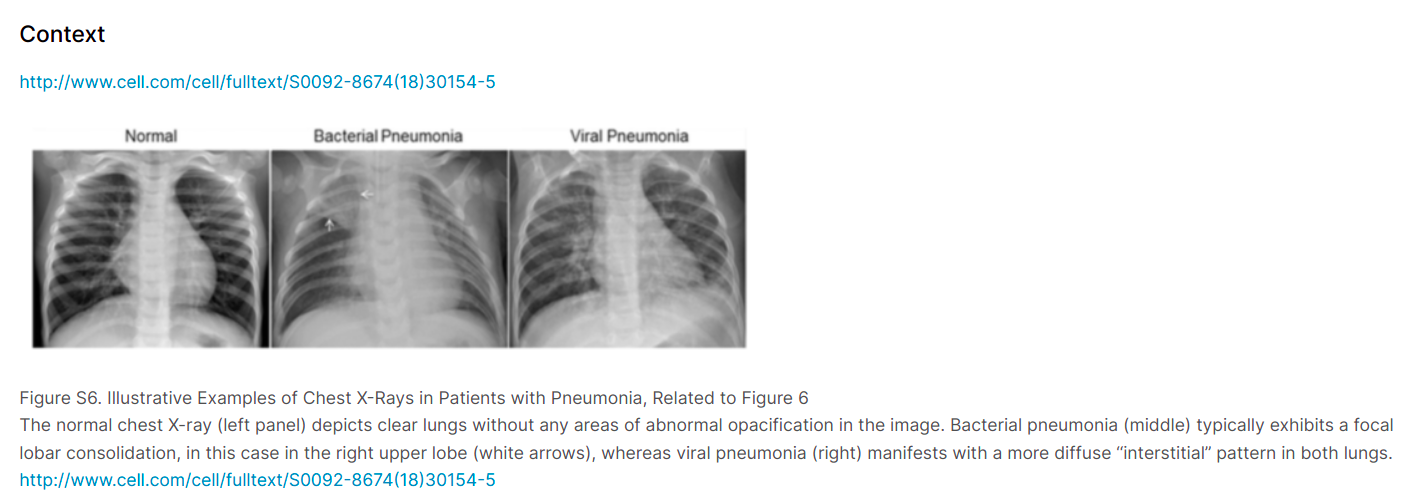
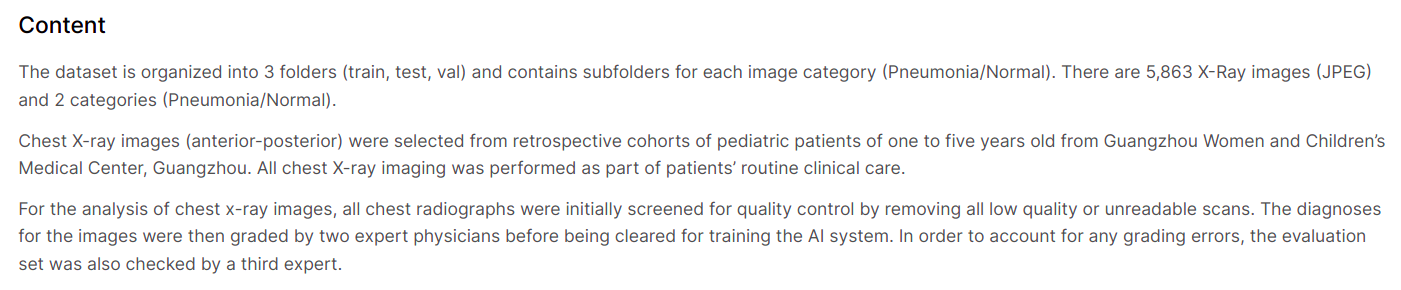

# Data Exploration
The goal here is to have a deeper understanding of the data to try to prepare it before building and training the model


In [2]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)


Found 5216 files belonging to 2 classes.


In [3]:
class_names = train_dataset.class_names
class_names

['NORMAL', 'PNEUMONIA']

In [4]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/test",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)


Found 624 files belonging to 2 classes.


In [5]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/val",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 16 files belonging to 2 classes.


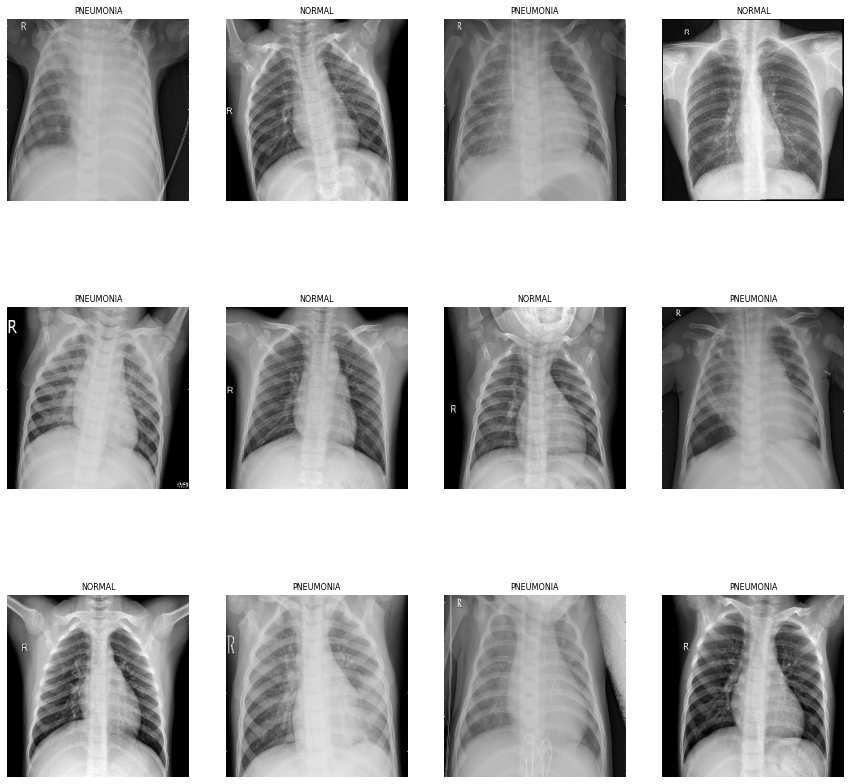

In [6]:
 plt.figure(figsize = (15,15))
 for image_batch, label_batch in train_dataset.take(1):
   for i in range(12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]],fontsize = 8)
     plt.axis("off")
  #  print(image_batch.shape[0].shape)

## Is the data balanced ?

In [7]:
# Let's get images array and classes in np array to make it easy for visualization
def get_img_class(tf_BatchDataset):
    data = tf_BatchDataset.unbatch()
    images = np.array(list(data.map(lambda x, y: x)))
    labels = np.array(list(data.map(lambda x, y: y)))
    print('NO.Images = ',len(images),'NO.Classes = ',len(labels),' Done!')
    return images , labels

In [8]:
images_train , classes_train = get_img_class(train_dataset)
images_test , classes_test = get_img_class(test_dataset)
images_val , classes_val = get_img_class(val_dataset)


NO.Images =  5216 NO.Classes =  5216  Done!
NO.Images =  624 NO.Classes =  624  Done!
NO.Images =  16 NO.Classes =  16  Done!


In [9]:
px.pie(names=classes_train,title='Train').show()

In [10]:
px.pie(names=classes_test,title='Test').show()

In [11]:
px.pie(names=classes_val,title='Val').show()

Finally something balance with just 16 image 😂 


# Results
i will make my data with 3 classes

In [12]:
!mkdir /kaggle/working/Data/

In [13]:
!mkdir /kaggle/working/Data/
!mkdir /kaggle/working/Data/Normal
!mkdir /kaggle/working/Data/bacteria
!mkdir /kaggle/working/Data/virus

mkdir: cannot create directory ‘/kaggle/working/Data/’: File exists


In [14]:
! cp ../input/chest-xray-pneumonia/chest_xray/train/NORMAL/*.jpeg /kaggle/working/Data/Normal
! cp ../input/chest-xray-pneumonia/chest_xray/test/NORMAL/*.jpeg /kaggle/working/Data/Normal
! cp ../input/chest-xray-pneumonia/chest_xray/val/NORMAL/*.jpeg /kaggle/working/Data/Normal

In [15]:
! cp ../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*_bacteria_*.jpeg /kaggle/working/Data/bacteria
! cp ../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/*_bacteria_*.jpeg /kaggle/working/Data/bacteria
! cp ../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*_bacteria_*.jpeg /kaggle/working/Data/bacteria

! cp ../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*_virus_*.jpeg /kaggle/working/Data/virus
! cp ../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/*_virus_*.jpeg /kaggle/working/Data/virus
! cp ../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*_virus_*.jpeg /kaggle/working/Data/virus

cp: cannot stat '../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*_virus_*.jpeg': No such file or directory


In [16]:
5216+624+16

5856

In [17]:
normal_new_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 5856 files belonging to 3 classes.


In [18]:
images_data , classes_data = get_img_class(normal_new_data)


NO.Images =  5856 NO.Classes =  5856  Done!


In [19]:
(unique, counts) = np.unique(classes_data, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 1583]
 [   1 2780]
 [   2 1493]]


In [20]:
px.pie(names=classes_data,title='Train').show()

In [21]:
!mkdir /kaggle/working/Data_blance/


In [22]:
! mkdir /kaggle/working/Data_blance/Train
! mkdir /kaggle/working/Data_blance/Test
! mkdir /kaggle/working/Data_blance/Val

In [23]:
! pwd

/kaggle/working


In [24]:
def cut_image(from_path,to_path,num):
  count=0
  m=from_path.split('/')
  # print('m = ',m)
  os.mkdir(to_path+m[-1])
  for jpgfile in glob.iglob(os.path.join(from_path, "*.jpeg")):
      if(count<num):
        c=to_path+'/'+m[-1]
        shutil.move(jpgfile, c)
        # print('c is ',c)
        count=count+1
      else:
        break


In [25]:
! cd /kaggle/working/Data_blance

In [26]:
from_dir = "/kaggle/working/Data/Normal"
to_dirs = "/kaggle/working/Data_blance/Train/"
img_nums =1300
cut_image(from_dir,to_dirs,img_nums)


from_dir = "/kaggle/working/Data/bacteria"
to_dirs = "/kaggle/working/Data_blance/Train/"
img_nums =1300
cut_image(from_dir,to_dirs,img_nums)



from_dir = "/kaggle/working/Data/virus"
to_dirs = "/kaggle/working/Data_blance/Train/"
img_nums =1300
cut_image(from_dir,to_dirs,img_nums)

In [27]:
from_dir = "/kaggle/working/Data/Normal"
to_dirs = "/kaggle/working/Data_blance/Test/"
img_nums =100
cut_image(from_dir,to_dirs,img_nums)


from_dir = "/kaggle/working/Data/bacteria"
to_dirs = "/kaggle/working/Data_blance/Test/"
img_nums =100
cut_image(from_dir,to_dirs,img_nums)



from_dir = "/kaggle/working/Data/virus"
to_dirs = "/kaggle/working/Data_blance/Test/"
img_nums =100
cut_image(from_dir,to_dirs,img_nums)

In [28]:
from_dir = "/kaggle/working/Data/Normal"
to_dirs = "/kaggle/working/Data_blance/Val/"
img_nums =93
cut_image(from_dir,to_dirs,img_nums)


from_dir = "/kaggle/working/Data/bacteria"
to_dirs = "/kaggle/working/Data_blance/Val/"
img_nums =93
cut_image(from_dir,to_dirs,img_nums)



from_dir = "/kaggle/working/Data/virus"
to_dirs = "/kaggle/working/Data_blance/Val/"
img_nums =93
cut_image(from_dir,to_dirs,img_nums)

In [29]:
! ls Data_blance/Train/Normal/ |  wc -l

1300


In [30]:
! ls Data_blance/Train/bacteria/ |  wc -l

1300


In [31]:
! ls Data_blance/Train/virus/ |  wc -l

1300


In [32]:
! ls Data/Normal/ |  wc -l

90


In [33]:
train_dataset_b = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data_blance/Train/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 3900 files belonging to 3 classes.


In [34]:
test_dataset_b = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data_blance/Test/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 300 files belonging to 3 classes.


In [35]:
val_dataset_b = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data_blance/Val/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 279 files belonging to 3 classes.


In [36]:
images_train_b , classes_train_b = get_img_class(train_dataset_b)
images_test_b , classes_test_b = get_img_class(test_dataset_b)
images_val_b , classes_val_b = get_img_class(val_dataset_b)


NO.Images =  3900 NO.Classes =  3900  Done!
NO.Images =  300 NO.Classes =  300  Done!
NO.Images =  279 NO.Classes =  279  Done!


In [37]:
px.pie(names=classes_train_b,title='Train _ blance').show()

In [38]:
px.pie(names=classes_test_b,title='Train _ blance').show()

In [39]:
px.pie(names=classes_val_b,title='Train _ blance').show()

In [40]:
! rm -R /kaggle/working/Data

# Final 
1. made my dataset with new class link of data [here](https://www.kaggle.com/ahmedhaytham/chest-xray-images-pneumonia-with-new-class)
2. Split data with more images in testing and validation
3. bulid model in this [Note Book](https://www.kaggle.com/ahmedhaytham/chest-x-ray-images-pneumonia-with-new-class)